In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [22]:
# Bytt til compact-versjonen for JSON
#url = "https://api.met.no/weatherapi/locationforecast/2.0/compact?lat=61.7798&lon=6.7736&altitude=1700" #ceciliekruna kooreedinater 

url = "https://api.met.no/weatherapi/locationforecast/2.0/compact?lat=61.88558&lon=6.83413&altitude=1011" #hoven koordinater

response = requests.get(url)
if response.status_code == 200:
    weather_data = response.json()

    # Hente temperaturdata
    timeseries = weather_data["properties"]["timeseries"]
    weather_list = [
        {"time": entry["time"], "temperature": entry["data"]["instant"]["details"]["air_temperature"]}
        for entry in timeseries
    ]

    df = pd.DataFrame(weather_list)
    print(df.head())  # Se de første radene


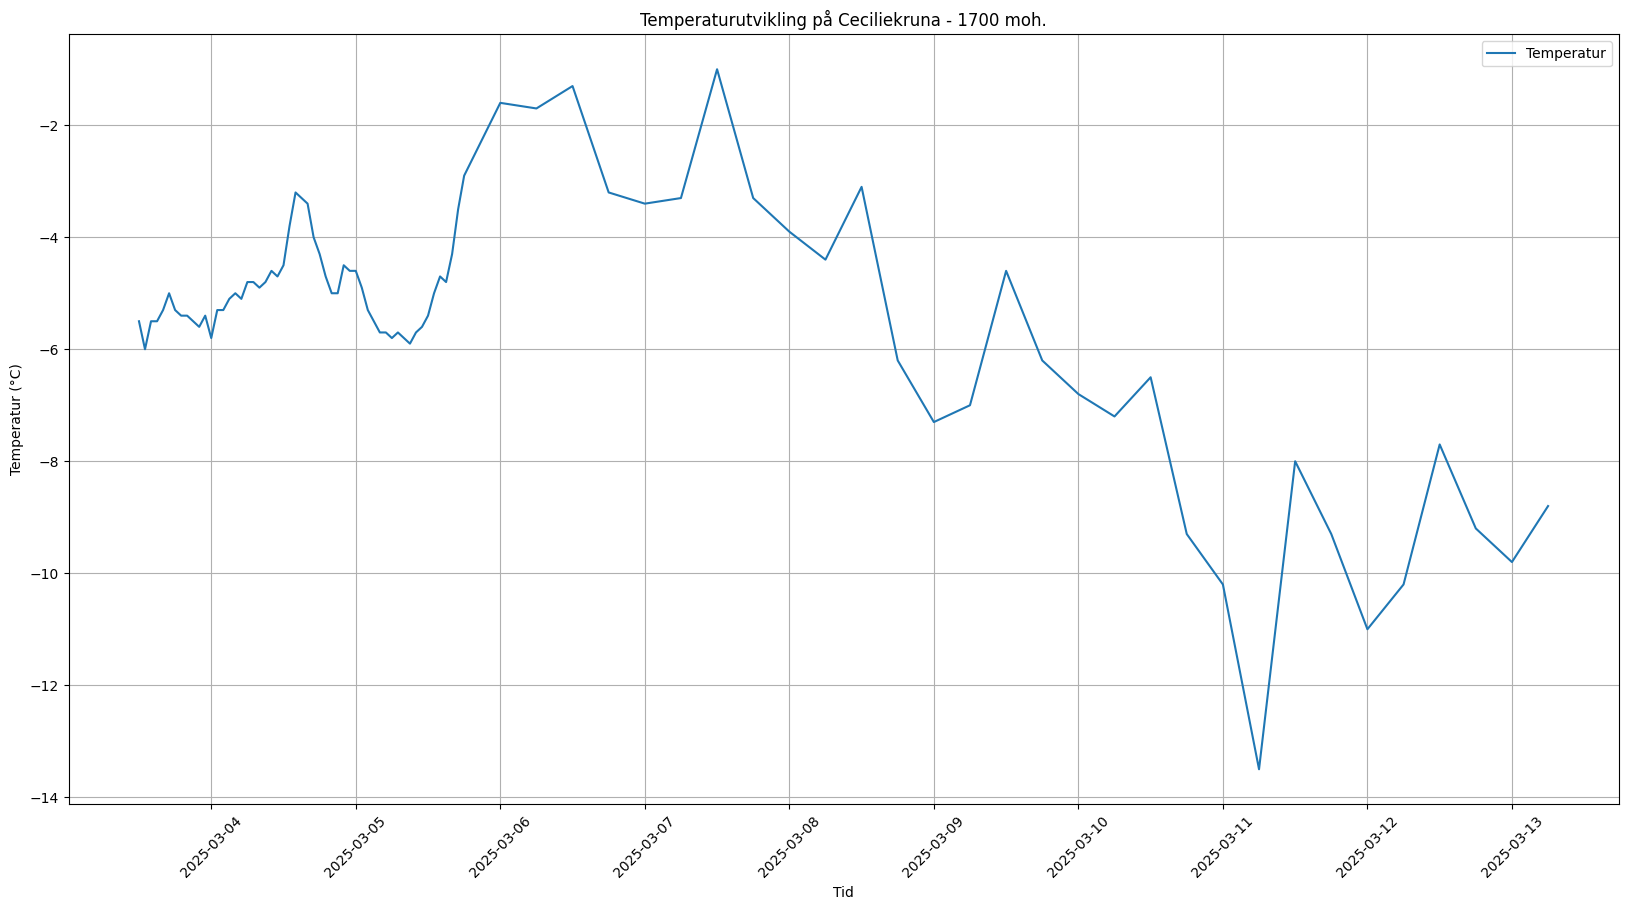

In [21]:
import matplotlib.pyplot as plt

df["time"] = pd.to_datetime(df["time"])  # Konvertere tid til datetime-format
plt.figure(figsize=(20,10))
plt.plot(df["time"], df["temperature"], label="Temperatur")
plt.xlabel("Tid")
plt.ylabel("Temperatur (°C)")
plt.title("Temperaturutvikling på Ceciliekruna - 1700 moh.")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()
